Data Preparation

In [1]:
# Import PyDrive2
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# autentikasi google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download file tweet.csv
file_id = '1gFz4Anh7AH9h_3TMMN4EU7E8vvq2jrkG'
downloaded = drive.CreateFile({'id': file_id})

# Save file secara temporary di memory gcolab
downloaded.GetContentFile('tweet.csv')

In [2]:
!pip install unidecode
!pip install Sastrawi
!pip install spacy
!python -m spacy download xx_ent_wiki_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 48.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from unidecode import unidecode
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Dataset Before Cleaning

In [4]:
df = pd.read_csv('tweet.csv')
print("Number of tweets : {}", format(len(df)))
print(df.head())

Number of tweets : {} 1815
   Unnamed: 0 sentimen                                              tweet
0           0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...
1           1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2           2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....
3           3  positif  Bagi Sumatera Selatan, Asian Games berdampak p...
4           4  negatif  Negara kita ngutang buat bngun infrastruktur y...


In [5]:
df.sample(10)

,Unnamed: 0,sentimen,tweet
608,608,netral,Fadli Zon: Prabowo Hanya Ingatkan Ekonomi Indo...
803,803,netral,Jokowi Tegaskan NKRI dan Bhineka Tunggal Ika H...
556,556,positif,Semoga Pak Prabowo jadi Presiden.. agar ekonom...
154,154,netral,"bisa, psimis amat si jd orang. dr pecinta game..."
699,699,netral,Jokowi : Diprediksi tahun 2045 indonesia menja...
895,895,netral,Ekonom CSIS Fajar B Hirawan menjelaskan faktor...
1108,1108,positif,Kesalahan presiden sebelumnya adalah merusak a...
1629,1629,negatif,"Gw streaming IDN Times, ada narsum yg ngejelas..."
575,575,negatif,Akui saja perekonomian Indonesia sudah salah a...
751,751,negatif,Prabowo Dinilai Tak Mengerti Sejarah Ekonomi B...


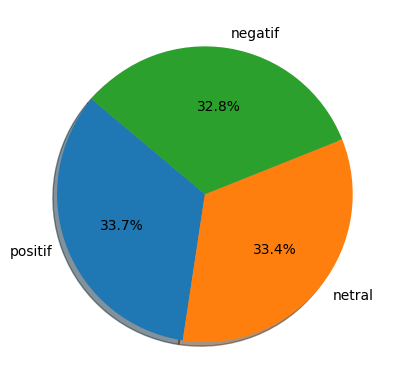

In [6]:
#Visualisasi dataset
sentiment_count = df["sentimen"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [7]:
print("Number of POSITIF tweets: {}".format(len(df[df["sentimen"] == "positif"])))
print("Number of NEGATIF tweets: {}".format(len(df[df["sentimen"] == "negatif"])))
print("Number of NETRAL tweets: {}".format(len(df[df["sentimen"] == "netral"])))

Number of POSITIF tweets: 612
Number of NEGATIF tweets: 596
Number of NETRAL tweets: 607


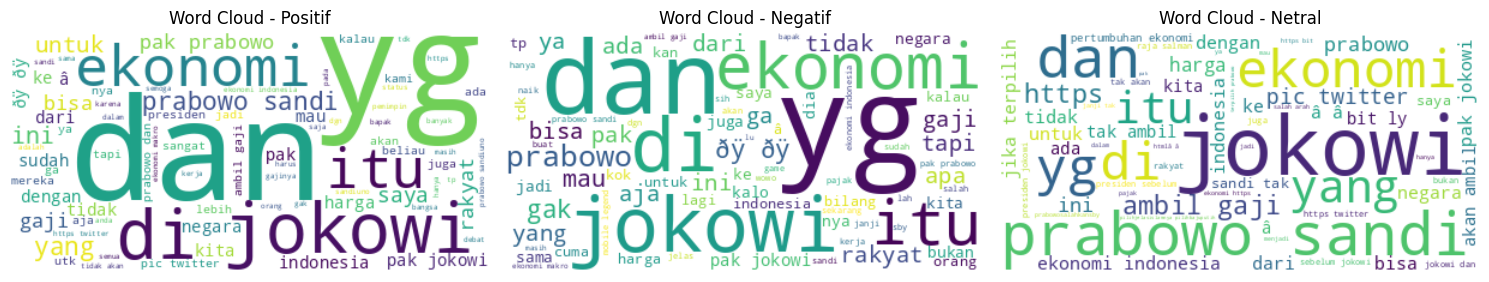

In [8]:
# Membuat figure dan axes untuk subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Word cloud untuk tweet positif
pos_tweets = df[df["sentimen"] == "positif"]
txt_pos = " ".join(tweet.lower() for tweet in pos_tweets["tweet"])
wordcloud_pos = WordCloud(width=400, height=200, background_color='white').generate(txt_pos)
axes[0].imshow(wordcloud_pos, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title('Word Cloud - Positif')

# Word cloud untuk tweet negatif
neg_tweets = df[df["sentimen"] == "negatif"]
txt_neg = " ".join(tweet.lower() for tweet in neg_tweets["tweet"])
wordcloud_neg = WordCloud(width=400, height=200, background_color='white').generate(txt_neg)
axes[1].imshow(wordcloud_neg, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title('Word Cloud - Negatif')

# Word cloud untuk tweet netral
net_tweets = df[df["sentimen"] == "netral"]
txt_net = " ".join(tweet.lower() for tweet in net_tweets["tweet"])
wordcloud_net = WordCloud(width=400, height=200, background_color='white').generate(txt_net)
axes[2].imshow(wordcloud_net, interpolation="bilinear")
axes[2].axis("off")
axes[2].set_title('Word Cloud - Netral')

# Menampilkan plot
plt.tight_layout()
plt.show()

Text Normalization

In [9]:
#Lowercasing
print("Sebelum Lowercasing:")
print(df.head())

df['tweet'] = df['tweet'].str.lower()

print("\nSetelah Lowercasing:")
print(df.head())

Sebelum Lowercasing:
   Unnamed: 0 sentimen                                              tweet
0           0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...
1           1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2           2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....
3           3  positif  Bagi Sumatera Selatan, Asian Games berdampak p...
4           4  negatif  Negara kita ngutang buat bngun infrastruktur y...

Setelah Lowercasing:
   Unnamed: 0 sentimen                                              tweet
0           0  negatif  kata @prabowo indonesia tidak dihargai bangsa ...
1           1   netral  batuan langka, tasbih jokowi hadiah dari habib...
2           2   netral  di era jokowi, ekonomi indonesia semakin baik....
3           3  positif  bagi sumatera selatan, asian games berdampak p...
4           4  negatif  negara kita ngutang buat bngun infrastruktur y...


In [10]:
#Menghapus tanda baca
print("Sebelum Menghapus Tanda Baca:")
print(df.head())

df['tweet'] = df['tweet'].str.replace(f"[{string.punctuation}]", "", regex=True)

print("\nSetelah Menghapus Tanda Baca:")
print(df.head())

Sebelum Menghapus Tanda Baca:
   Unnamed: 0 sentimen                                              tweet
0           0  negatif  kata @prabowo indonesia tidak dihargai bangsa ...
1           1   netral  batuan langka, tasbih jokowi hadiah dari habib...
2           2   netral  di era jokowi, ekonomi indonesia semakin baik....
3           3  positif  bagi sumatera selatan, asian games berdampak p...
4           4  negatif  negara kita ngutang buat bngun infrastruktur y...

Setelah Menghapus Tanda Baca:
   Unnamed: 0 sentimen                                              tweet
0           0  negatif  kata prabowo indonesia tidak dihargai bangsa a...
1           1   netral  batuan langka tasbih jokowi hadiah dari habib ...
2           2   netral  di era jokowi ekonomi indonesia semakin baik 0...
3           3  positif  bagi sumatera selatan asian games berdampak pd...
4           4  negatif  negara kita ngutang buat bngun infrastruktur y...


In [11]:
# Memproses tweet berisi angka
jumlah_dengan_angka = df['tweet'].str.contains(r'\d+', regex=True).sum()
print("Jumlah tweet yang mengandung angka:", jumlah_dengan_angka)

Jumlah tweet yang mengandung angka: 1065


In [12]:
tweets_dengan_angka = df[df['tweet'].str.contains(r'\d+', regex=True)]
pd.set_option('display.max_colwidth', None)
print(tweets_dengan_angka.head(10))


    Unnamed: 0 sentimen  \
0            0  negatif   
1            1   netral   
2            2   netral   
3            3  positif   
9            9  negatif   
10          10  positif   
11          11  positif   
13          13  positif   
14          14   netral   
15          15   netral   

                                                                                                                                                                                                                                                                                                        tweet  
0                                                                                                                       kata prabowo indonesia tidak dihargai bangsa asing   berita ini ðÿ‘‡ pasti hoax buatan penguasa ya kan rockygerungðÿ˜œ httpstwittercommediaindonesiastatus1117575436337160192s21â â€¦  
1                                                                                             

In [13]:
# Menghapus angka
df['tweet'] = df['tweet'].str.replace(r'\d+', '', regex=True)
pd.reset_option('display.max_colwidth')
print(df.head())

   Unnamed: 0 sentimen                                              tweet
0           0  negatif  kata prabowo indonesia tidak dihargai bangsa a...
1           1   netral  batuan langka tasbih jokowi hadiah dari habib ...
2           2   netral  di era jokowi ekonomi indonesia semakin baik i...
3           3  positif  bagi sumatera selatan asian games berdampak pd...
4           4  negatif  negara kita ngutang buat bngun infrastruktur y...


In [14]:
# mengelola spasi berlebih dan variasi aksen
spasi_berlebih = df['tweet'].str.contains(r'\s{2,}', regex=True)
jumlah_spasi_berlebih = spasi_berlebih.sum()

variasi_aksen = df['tweet'].str.contains(r'[áéíóúãâêîôû]', regex=True)
jumlah_variasi_aksen = variasi_aksen.sum()

print("Jumlah tweet dengan spasi berlebih:", jumlah_spasi_berlebih)
print("Jumlah tweet dengan variasi aksen:", jumlah_variasi_aksen)

Jumlah tweet dengan spasi berlebih: 1109
Jumlah tweet dengan variasi aksen: 508


In [15]:
# mengelola spasi berlebih
df['tweet'] = df['tweet'].str.strip()
df['tweet'] = df['tweet'].str.replace(r'\s+', ' ', regex=True)
#mengubah aksen
df['tweet'] = df['tweet'].apply(unidecode)

spasi_berlebih = df['tweet'].str.contains(r'\s{2,}', regex=True)
jumlah_spasi_berlebih = spasi_berlebih.sum()

variasi_aksen = df['tweet'].str.contains(r'[áéíóúãâêîôû]', regex=True)
jumlah_variasi_aksen = variasi_aksen.sum()
print("Jumlah tweet dengan spasi berlebih:", jumlah_spasi_berlebih)
print("Jumlah tweet dengan variasi aksen:", jumlah_variasi_aksen)

Jumlah tweet dengan spasi berlebih: 0
Jumlah tweet dengan variasi aksen: 0


In [16]:
#menghapus sisa
import re

def clean_text(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    emoji_pattern = re.compile(
        "["u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    tweet = tweet.strip()
    return tweet

df['tweet'] = df['tweet'].apply(clean_text)
print(df.head())

   Unnamed: 0 sentimen                                              tweet
0           0  negatif  kata prabowo indonesia tidak dihargai bangsa a...
1           1   netral  batuan langka tasbih jokowi hadiah dari habib ...
2           2   netral  di era jokowi ekonomi indonesia semakin baik i...
3           3  positif  bagi sumatera selatan asian games berdampak pd...
4           4  negatif  negara kita ngutang buat bngun infrastruktur y...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
  stop_words = set(stopwords.words('indonesian'))
  text_lowered = text.lower()
  cleaned_text = ' '.join([word for word in text_lowered.split(' ') if word not in stop_words])
  return cleaned_text

df['tweet'] = df['tweet'].apply(remove_stopwords)
print(df.head())

In [17]:
#stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stem_text(tweet):
    return stemmer.stem(tweet)

df['stemming'] = df['tweet'].apply(stem_text)
print(df['stemming'])

0       kata prabowo indonesia tidak harga bangsa asin...
1       batu langka tasbih jokowi hadiah dari habib lu...
2       di era jokowi ekonomi indonesia makin baik ind...
3       bagi sumatera selatan asi games dampak pd ekon...
4       negara kita ngutang buat bngun infrastruktur y...
                              ...                        
1810    negarawan sejati sll bangga dan depan harga di...
1811    hrs ceramah di damai indonesia ekonomi makin b...
1812    mari bangun bangsa dgn dukung ekonomi negara s...
1813    bantu maju ekonomi bangsa sama pak jokowi yuk ...
1814    pak jokowi ubah cara pandang ekonomi kini semu...
Name: stemming, Length: 1815, dtype: object


In [26]:
#Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize_text(stemmed_tweet):
    return nltk.tokenize.TweetTokenizer().tokenize(stemmed_tweet)

df['tokens'] = df['stemming'].apply(tokenize_text)
print(df['tokens'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [kata, prabowo, indonesia, tidak, harga, bangs...
1       [batu, langka, tasbih, jokowi, hadiah, dari, h...
2       [di, era, jokowi, ekonomi, indonesia, makin, b...
3       [bagi, sumatera, selatan, asi, games, dampak, ...
4       [negara, kita, ngutang, buat, bngun, infrastru...
                              ...                        
1810    [negarawan, sejati, sll, bangga, dan, depan, h...
1811    [hrs, ceramah, di, damai, indonesia, ekonomi, ...
1812    [mari, bangun, bangsa, dgn, dukung, ekonomi, n...
1813    [bantu, maju, ekonomi, bangsa, sama, pak, joko...
1814    [pak, jokowi, ubah, cara, pandang, ekonomi, ki...
Name: tokens, Length: 1815, dtype: object


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Coba Menggunakan TF-IDF untuk vectorization
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X = tfidf_vectorizer.fit_transform(df['tokens'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [35]:
from sklearn.model_selection import train_test_split

y = df['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
!pip install tensorflow

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Contoh DataFrame df (pastikan df telah ada sebelumnya)
# df = pd.read_csv('tweet.csv') # Misalkan Anda memuat dataset di sini

# Encode labels
y = df['sentimen']  # Pastikan label sentimen ada di kolom ini
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Menggunakan Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens'])  # Fit tokenizer pada teks yang sudah ditokenisasi
sequences = tokenizer.texts_to_sequences(df['tokens'])  # Mengonversi teks menjadi urutan indeks

# Padding sequences
max_length = max(len(x) for x in sequences)
X_pad = pad_sequences(sequences, maxlen=max_length)

# Split dataset
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

# Membangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))
model.add(LSTM(100))
model.add(Dense(len(le.classes_), activation='softmax'))  # Sesuaikan dengan jumlah kelas Anda

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32)

# Evaluasi
loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm)
print(f"LSTM Model Accuracy: {accuracy}")

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.3727 - loss: 1.0809
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6201 - loss: 0.9157
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8171 - loss: 0.5017
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9228 - loss: 0.2430
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9682 - loss: 0.1195
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9803 - loss: 0.0766
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9889 - loss: 0.0494
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9912 - loss: 0.0390
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9900 - loss: 0.0311
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9923 - loss: 0.0214
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5732 - loss: 1.5495
LSTM Model Accuracy: 0.5674931406974792


In [45]:
#Coba tunning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt

# Fungsi untuk membangun model LSTM
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=hp.Int('embedding_dim', min_value=50, max_value=300, step=50)))
    model.add(layers.LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=False))
    model.add(layers.Dense(len(le.classes_), activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Membuat objek tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='helloworld'
)

# Menentukan batch size di luar fungsi
batch_size = 32  # Anda bisa mengubah nilai ini sesuai kebutuhan

# Melatih model dengan hyperparameter tuning
tuner.search(X_train_lstm, y_train_lstm,
             epochs=10,
             batch_size=batch_size,
             validation_data=(X_test_lstm, y_test_lstm))

# Mencetak hasil tunning
tuner.results_summary()

# Mendapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluasi model terbaik
loss, accuracy = best_model.evaluate(X_test_lstm, y_test_lstm)
print(f"Best Model Accuracy: {accuracy}")

Trial 10 Complete [00h 01m 01s]
val_accuracy: 0.6170799136161804

Best val_accuracy So Far: 0.6170799136161804
Total elapsed time: 00h 09m 47s
Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
embedding_dim: 150
units: 150
learning_rate: 0.0013125809014993615
Score: 0.6170799136161804

Trial 02 summary
Hyperparameters:
embedding_dim: 200
units: 50
learning_rate: 0.0006141249907035979
Score: 0.6143250465393066

Trial 04 summary
Hyperparameters:
embedding_dim: 100
units: 150
learning_rate: 0.0016234807421441969
Score: 0.6143250465393066

Trial 07 summary
Hyperparameters:
embedding_dim: 200
units: 150
learning_rate: 0.001100329848883672
Score: 0.6143250465393066

Trial 08 summary
Hyperparameters:
embedding_dim: 300
units: 50
learning_rate: 0.00010528350606019057
Score: 0.6115702390670776

Trial 05 summary
Hyperparameters:
embedding_dim: 300
units: 150
learning_rate: 0.0019091136129580559
S

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6360 - loss: 1.0509
Best Model Accuracy: 0.6170799136161804


In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Step 1: Preprocess the text for LSTM input
max_words = 5000
max_len = 100

# Step 1a: Tokenizing the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['tokens'])  # Fit tokenizer pada teks yang sudah ditokenisasi
sequences = tokenizer.texts_to_sequences(df['tokens'])  # Mengonversi teks menjadi urutan indeks

# Step 1b: Padding sequences
X = pad_sequences(sequences, maxlen=max_len)  # Ubah dari X menjadi sequences

# Step 1c: Encode the sentiment labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentimen'])

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Building the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Ganti 3 dengan len(label_encoder.classes_)

# Step 4: Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the model and store the training history
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {accuracy * 100:.2f}%")

# Step 7: Make predictions and print classification report
y_pred_lstm = np.argmax(model.predict(X_test), axis=1)
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm, target_names=label_encoder.classes_))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
46/46 - 14s - 301ms/step - accuracy: 0.4160 - loss: 1.0637 - val_accuracy: 0.4463 - val_loss: 1.0368
Epoch 2/5
46/46 - 10s - 214ms/step - accuracy: 0.6116 - loss: 0.9102 - val_accuracy: 0.5730 - val_loss: 0.9190
Epoch 3/5
46/46 - 12s - 260ms/step - accuracy: 0.7803 - loss: 0.5747 - val_accuracy: 0.6198 - val_loss: 0.8912
Epoch 4/5
46/46 - 9s - 197ms/step - accuracy: 0.8871 - loss: 0.3104 - val_accuracy: 0.5923 - val_loss: 1.1246
Epoch 5/5
46/46 - 9s - 187ms/step - accuracy: 0.9346 - loss: 0.2024 - val_accuracy: 0.5675 - val_loss: 1.1270
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5872 - loss: 1.0340
LSTM Accuracy: 56.75%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

     negatif       0.57      0.61      0.59       115
      netral       0.56      0.65      0.60       118
     positif       0.57      0.45      0.50       130

    accuracy                           0.57       363
   macro a

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim=max_words, output_dim=hp.Int('embedding_dim', min_value=50, max_value=300, step=50), input_length=max_len))
    model.add(layers.LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), dropout=0.2, recurrent_dropout=0.2))
    model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Membuat objek tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Melatih model dengan hyperparameter tuning
tuner.search(X_train, y_train,
             epochs=10,
             batch_size=32,  # Anda bisa mengubah ini jika ingin men-tune batch size juga
             validation_data=(X_test, y_test))

# Mencetak hasil tuning
tuner.results_summary()
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluasi model terbaik
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Model Accuracy: {accuracy * 100:.2f}%")

# Membuat prediksi dan mencetak laporan klasifikasi
y_pred_best = np.argmax(best_model.predict(X_test), axis=1)
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

Trial 10 Complete [00h 00m 48s]
val_accuracy: 0.6253443360328674

Best val_accuracy So Far: 0.6391184329986572
Total elapsed time: 00h 24m 02s
Results summary
Results in my_dir/lstm_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
embedding_dim: 100
units: 50
learning_rate: 0.0013160349968348475
Score: 0.6391184329986572

Trial 00 summary
Hyperparameters:
embedding_dim: 300
units: 100
learning_rate: 0.00022238343981901095
Score: 0.6336088180541992

Trial 07 summary
Hyperparameters:
embedding_dim: 200
units: 50
learning_rate: 0.001036730293668521
Score: 0.6308540105819702

Trial 03 summary
Hyperparameters:
embedding_dim: 300
units: 150
learning_rate: 0.0006279852209383304
Score: 0.6253443360328674

Trial 06 summary
Hyperparameters:
embedding_dim: 100
units: 200
learning_rate: 0.003314403406327545
Score: 0.6253443360328674

Trial 09 summary
Hyperparameters:
embedding_dim: 150
units: 50
learning_rate: 0.0001515305893541417
Sc

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6588 - loss: 0.7961
Best Model Accuracy: 63.91%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Best Model Classification Report:
               precision    recall  f1-score   support

     negatif       0.59      0.72      0.65       115
      netral       0.66      0.64      0.65       118
     positif       0.67      0.57      0.62       130

    accuracy                           0.64       363
   macro avg       0.64      0.64      0.64       363
weighted avg       0.64      0.64      0.64       363



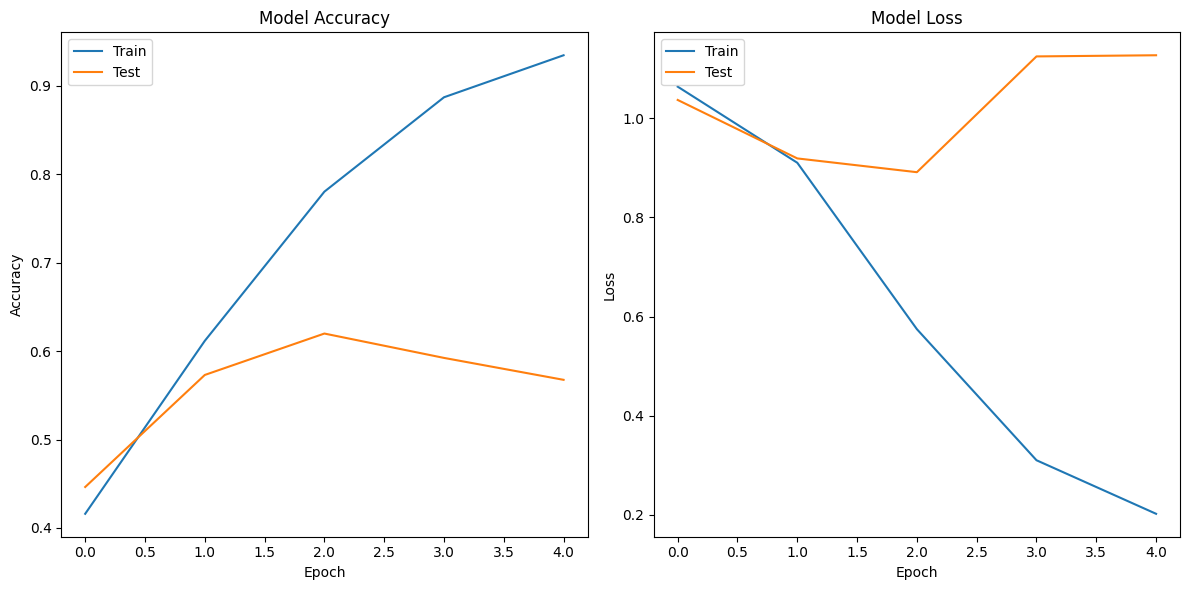

In [50]:
# Visualization
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

    Negative       0.57      0.61      0.59       115
     Neutral       0.56      0.65      0.60       118
    Positive       0.57      0.45      0.50       130

    accuracy                           0.57       363
   macro avg       0.57      0.57      0.57       363
weighted avg       0.57      0.57      0.56       363



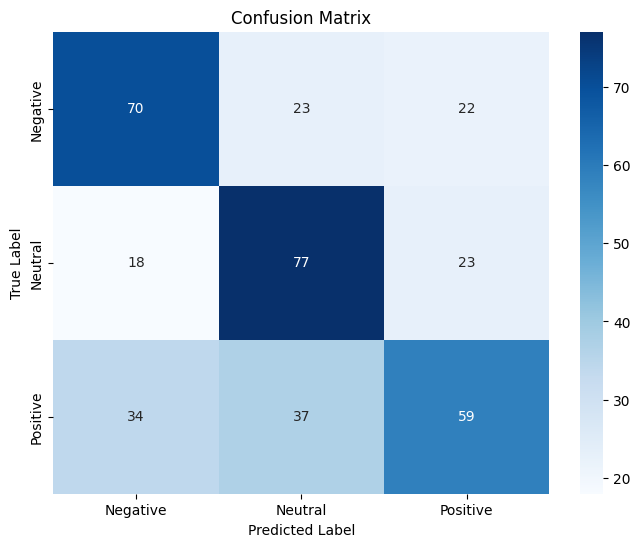

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Make predictions and print classification report
y_pred_lstm = np.argmax(model.predict(X_test), axis=1)
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm, target_names=["Negative", "Neutral", "Positive"]))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lstm)

# Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt
from sklearn.metrics import classification_report

# Fungsi untuk membangun model LSTM dengan hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()

    # Menentukan dimensi embedding
    model.add(layers.Embedding(input_dim=max_words,
                                output_dim=hp.Int('embedding_dim', min_value=50, max_value=300, step=50),
                                input_length=max_len))

    # Menambahkan satu atau lebih layer LSTM
    for i in range(hp.Int('lstm_layers', 1, 3)):  # Menentukan jumlah layer LSTM
        model.add(layers.LSTM(units=hp.Int(f'units_{i}', min_value=50, max_value=200, step=50),
                               dropout=hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1),
                               recurrent_dropout=hp.Float(f'recurrent_dropout_{i}', 0.1, 0.5, step=0.1),
                               return_sequences=True if i < hp.get('lstm_layers') - 1 else False))

    # Menambahkan layer Dense
    model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

    # Menggunakan optimizer Adam dengan learning rate yang dapat diatur
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Membuat objek tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # Meningkatkan jumlah trials untuk eksplorasi lebih baik
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Melatih model dengan hyperparameter tuning
tuner.search(X_train, y_train,
             epochs=10,
             batch_size=32,  # Anda bisa mengubah ini jika ingin men-tune batch size juga
             validation_data=(X_test, y_test))

# Mencetak hasil tuning
tuner.results_summary()

# Mendapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluasi model terbaik
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Model Accuracy: {accuracy * 100:.2f}%")

# Membuat prediksi dan mencetak laporan klasifikasi
y_pred_best = np.argmax(best_model.predict(X_test), axis=1)
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

Trial 14 Complete [00h 03m 21s]
val_accuracy: 0.6280992031097412

Best val_accuracy So Far: 0.6391184329986572
Total elapsed time: 00h 49m 57s

Search: Running Trial #15

Value             |Best Value So Far |Hyperparameter
200               |100               |embedding_dim
50                |50                |units
0.0086079         |0.001316          |learning_rate
1                 |None              |lstm_layers
200               |None              |units_0
0.3               |None              |dropout_0
0.2               |None              |recurrent_dropout_0
50                |None              |units_1
0.1               |None              |dropout_1
0.5               |None              |recurrent_dropout_1
150               |None              |units_2
0.1               |None              |dropout_2
0.1               |None              |recurrent_dropout_2

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 324ms/step - accuracy: 0.4426 - loss: 1.0624 - val_accuracy: 0.5372 - val_loss: